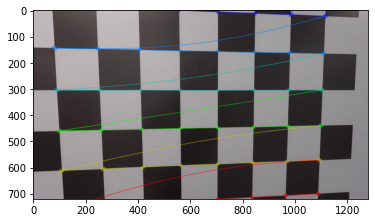

In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 8 
#TODO: enter the number of inside corners in x
ny = 6
#TODO: enter the number of inside corners in y
imagePoints=[]
objPoints = []

objP = np.zeros((6*8,3),np.float32)
objP[:,:2]=np.mgrid[0:8,0:6].T.reshape(-1,2)

# Make a list of calibration images
fname = 'calibration_test.png'
img = cv2.imread(fname)
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
# If found, draw corners
if ret == True:
    imagePoints.append(corners)
    objPoints.append(objP)
    
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints,imagePoints,gray.shape[::-1],None,None)

dst = cv2.undistort(img,mtx,dist,None,mtx)

plt.imshow(dst)